In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### WALKTHROUGH

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [101]:
df.shape

(537577, 12)

In [102]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [104]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### ANALYZING COLUMNS

In [105]:
df['User_ID'].nunique()

5891

In [106]:
df['Product_ID'].nunique()

3623

In [107]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [108]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [109]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [110]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [111]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [112]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [113]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [114]:
df['Purchase'].nunique()

17959

In [115]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [116]:
for column in df.columns:
    print(df[column].nunique(), "\t:", column)

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category_1
17959 	: Purchase


### ANALYZING GENDER

In [117]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])

In [118]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

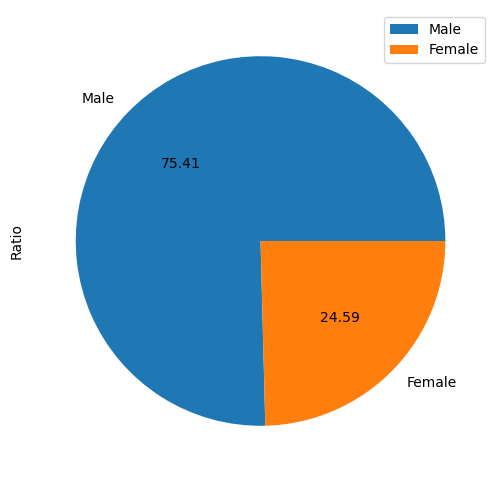

In [119]:
data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = '%.2f')

<Axes: title={'center': 'GENDER RATIO'}>

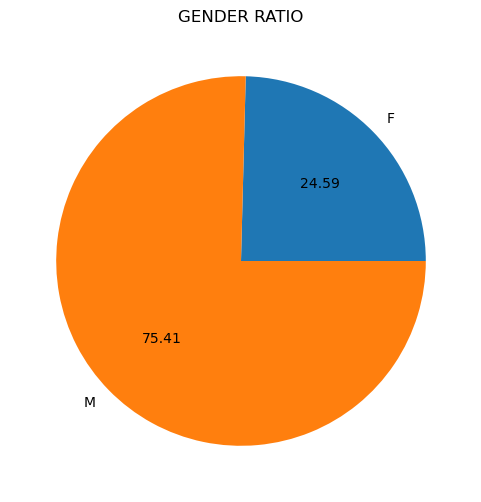

In [120]:
df.groupby('Gender').size().plot(kind = 'pie',
                                figsize = (6,6),
                                autopct = '%.2f',
                                title = 'GENDER RATIO')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_12320\1455668572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie',


<Axes: ylabel='Purchase'>

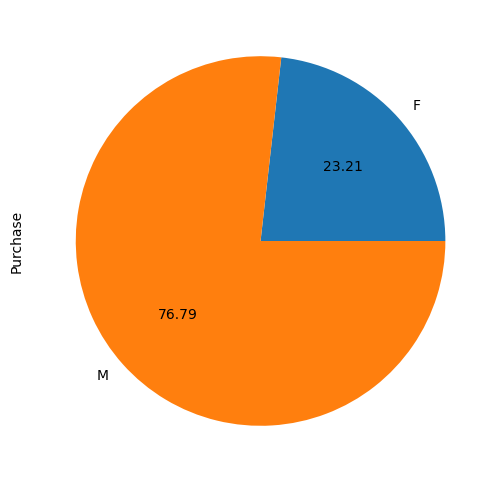

In [121]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie',
                                           figsize = (6,6),
                                           autopct = "%.2f")

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_12320\1690238583.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie',


<Axes: ylabel='Purchase'>

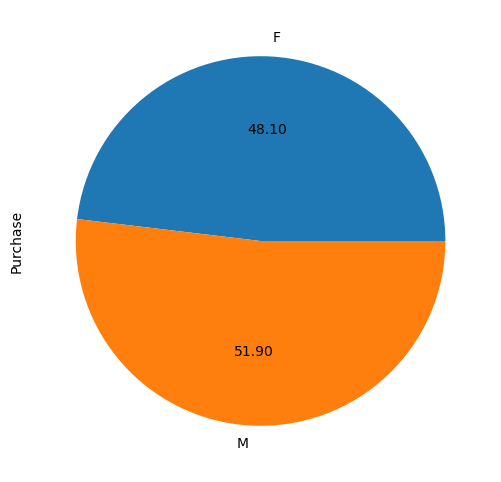

In [122]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie',
                                           figsize = (6,6),
                                           autopct = "%.2f")

### ANALYZING AGE AND MMARITAL STATUS

<Axes: title={'center': 'Purchase Distribution By age'}, xlabel='Age'>

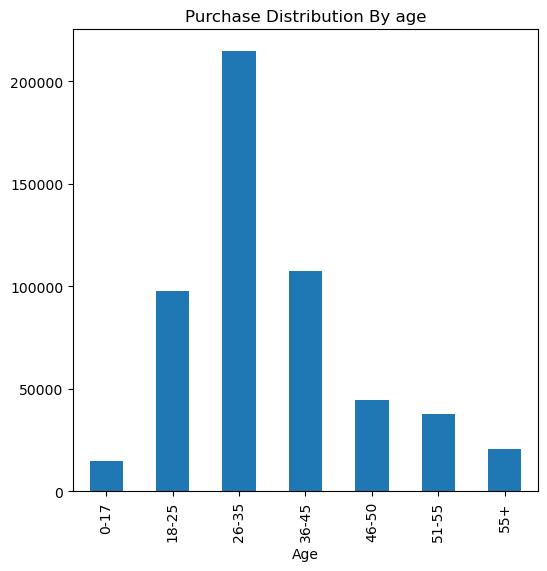

In [123]:
df.groupby('Age').size().plot(kind = 'bar',
                             figsize = (6,6),
                             title = 'Purchase Distribution By age')

<Axes: xlabel='Age'>

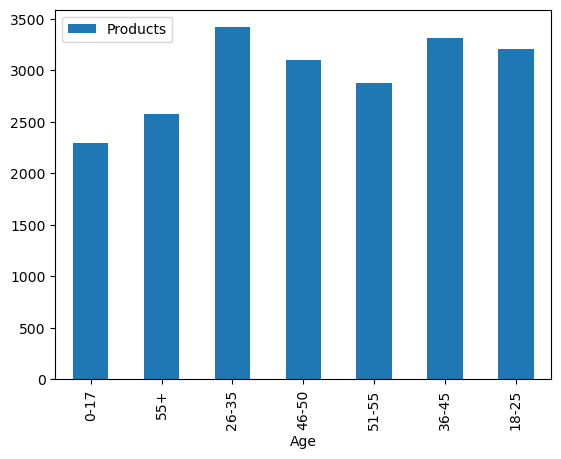

In [124]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst, columns = ['Age', 'Products'])
data.plot.bar(x = 'Age')

In [125]:
len(df[df['Age'] == i])

97634

In [126]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

In [127]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_12320\2929724930.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (6,6), title = 'Amount spending By age')


<Axes: title={'center': 'Amount spending By age'}, xlabel='Age'>

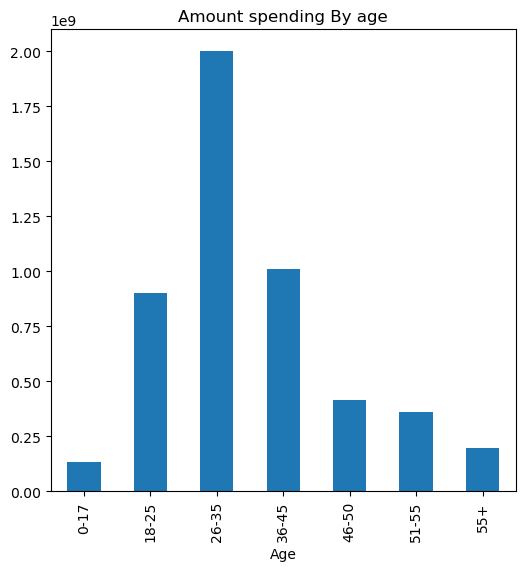

In [128]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (6,6), title = 'Amount spending By age')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_12320\3936245573.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind = 'bar',


<Axes: title={'center': 'Purchase Distribution By age'}, xlabel='Age'>

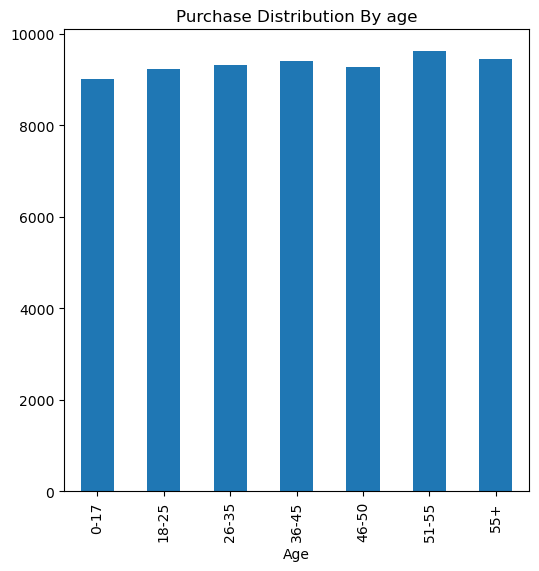

In [129]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar',
                             figsize = (6,6),
                             title = 'Purchase Distribution By age')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_12320\2893562586.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', title = 'Purchase Distribution By age', autopct = '%.2f')


<Axes: title={'center': 'Purchase Distribution By age'}, ylabel='Purchase'>

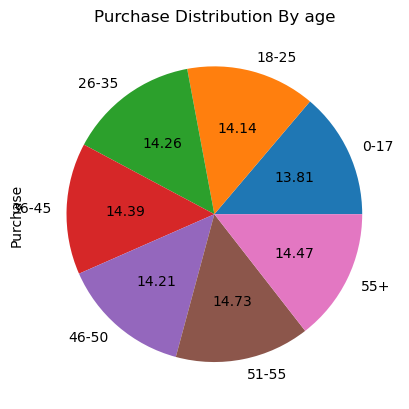

In [130]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', title = 'Purchase Distribution By age', autopct = '%.2f')

<Axes: title={'center': 'Purchase Distribution By age'}>

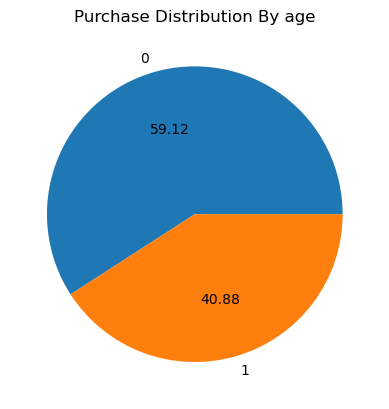

In [133]:
df.groupby('Marital_Status').size().plot(kind = 'pie', title = 'Purchase Distribution By age', autopct = '%.2f')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_12320\3091888531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Marital_Status').mean()['Purchase'].plot(kind = 'bar', title = 'Purchase Distribution By age')


<Axes: title={'center': 'Purchase Distribution By age'}, xlabel='Marital_Status'>

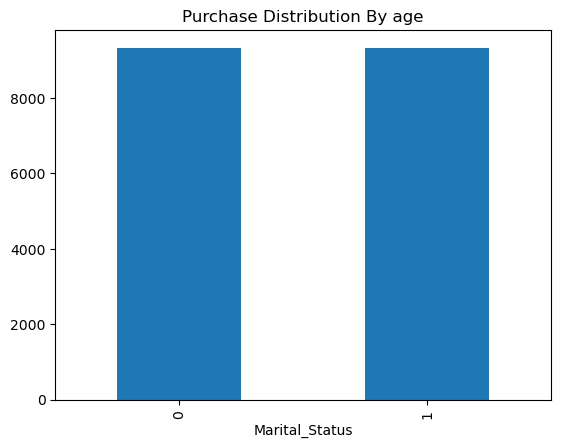

In [136]:
df.groupby('Marital_Status').mean()['Purchase'].plot(kind = 'bar', title = 'Purchase Distribution By age')

### MULTI COLUMS ANALYZING

<Axes: xlabel='Age', ylabel='count'>

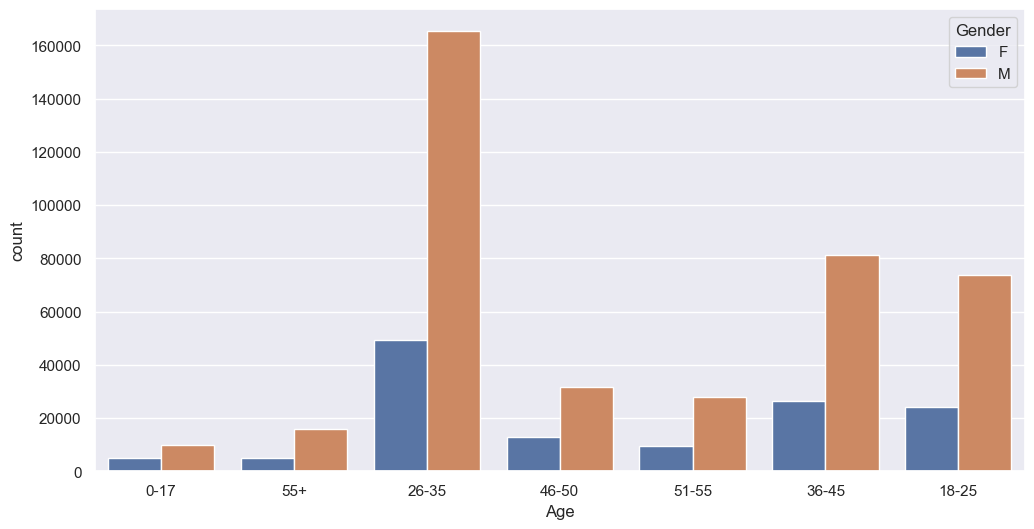

In [5]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Age', hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

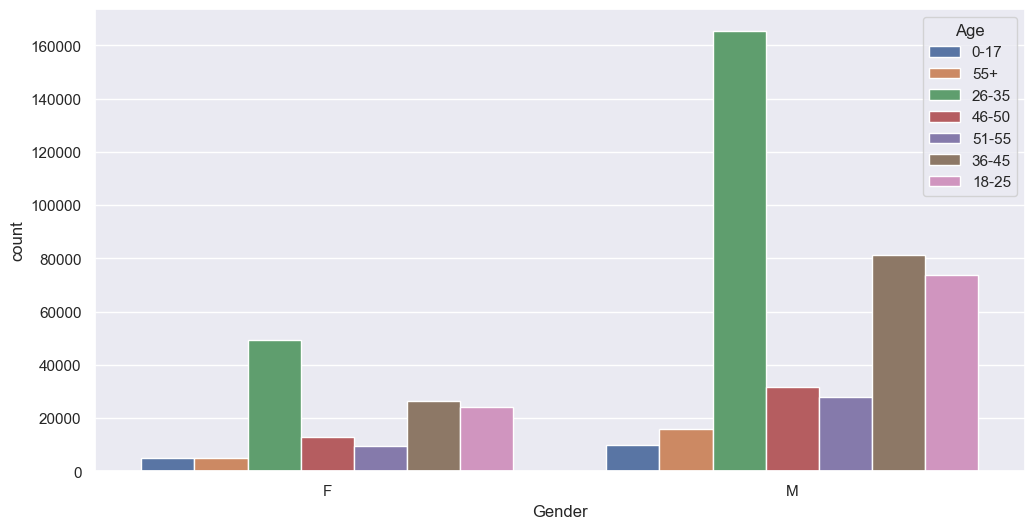

In [6]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Gender', hue = 'Age', data = df)

<Axes: xlabel='Gender', ylabel='count'>

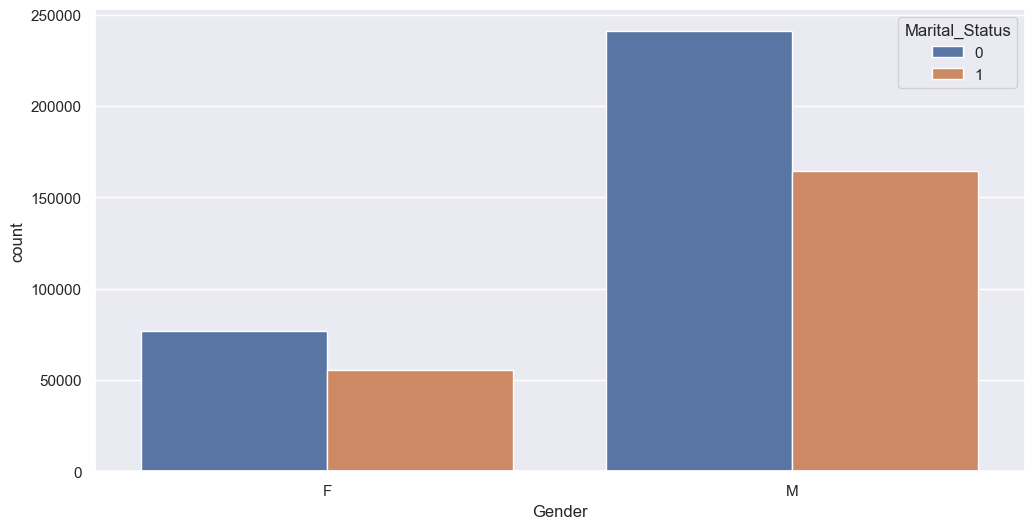

In [7]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Gender', hue = 'Marital_Status', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

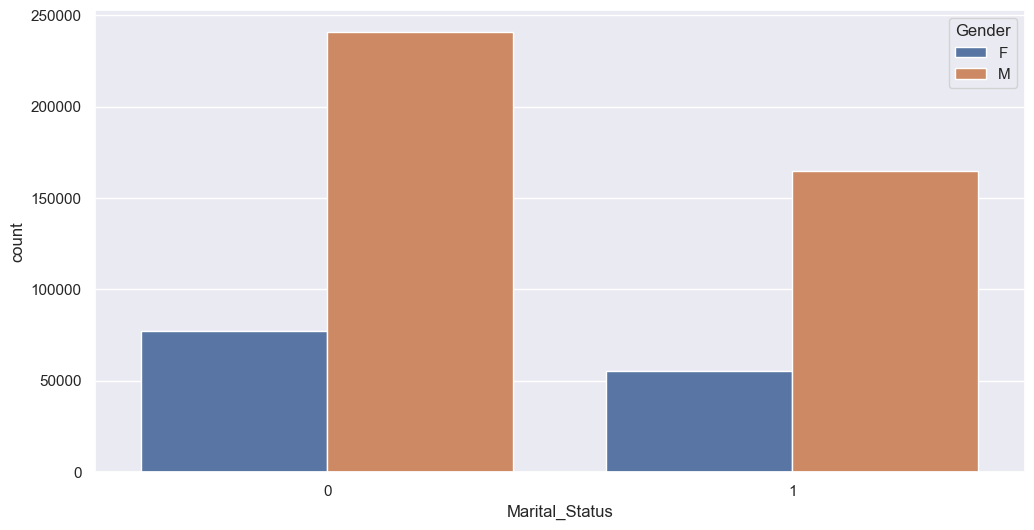

In [8]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Marital_Status', hue = 'Gender', data = df)

In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

<Axes: xlabel='City_Category', ylabel='count'>

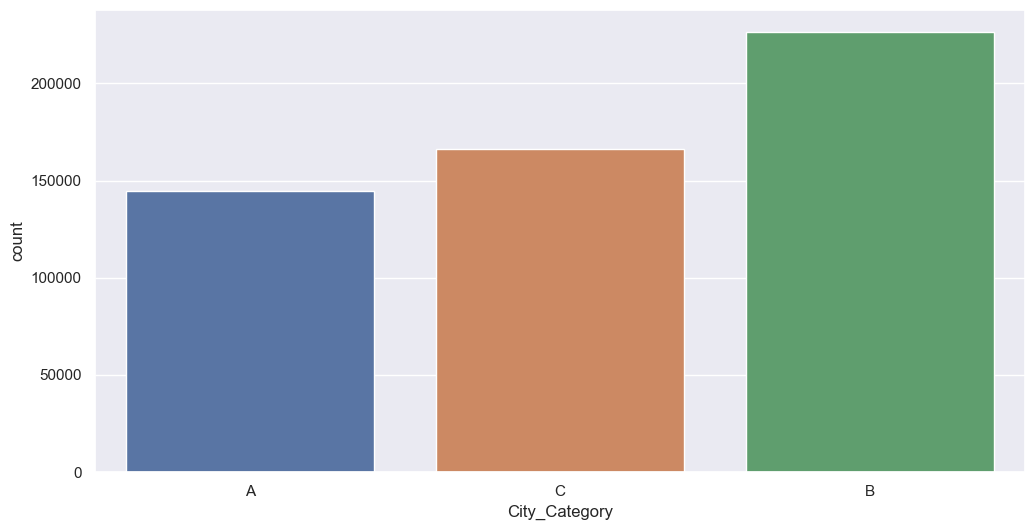

In [10]:
sns.countplot(x = df['City_Category'])

<Axes: >

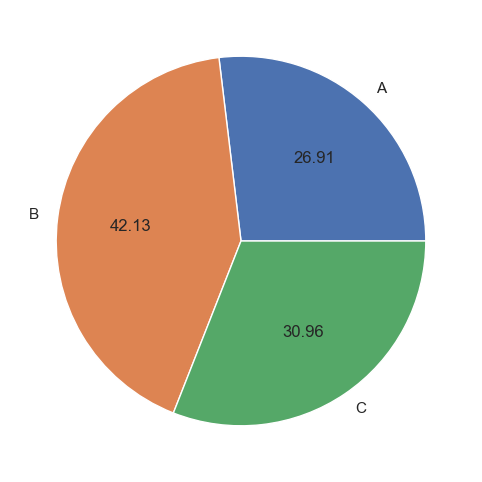

In [12]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%.2f')

<Axes: xlabel='City_Category', ylabel='count'>

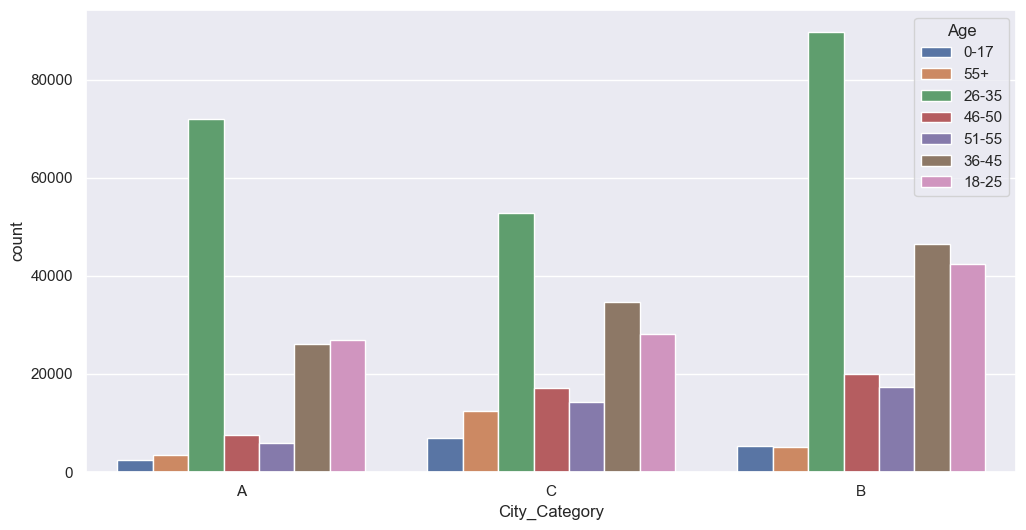

In [13]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

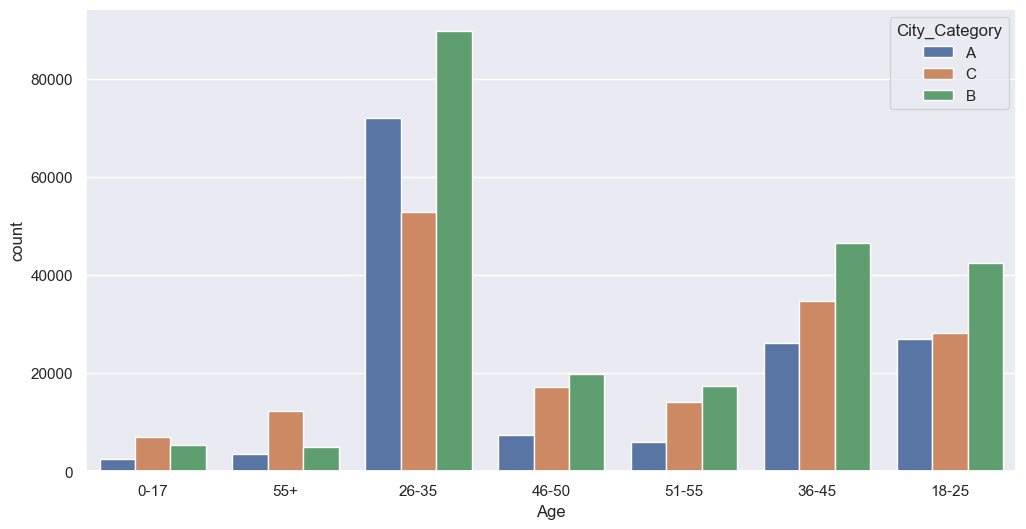

In [14]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

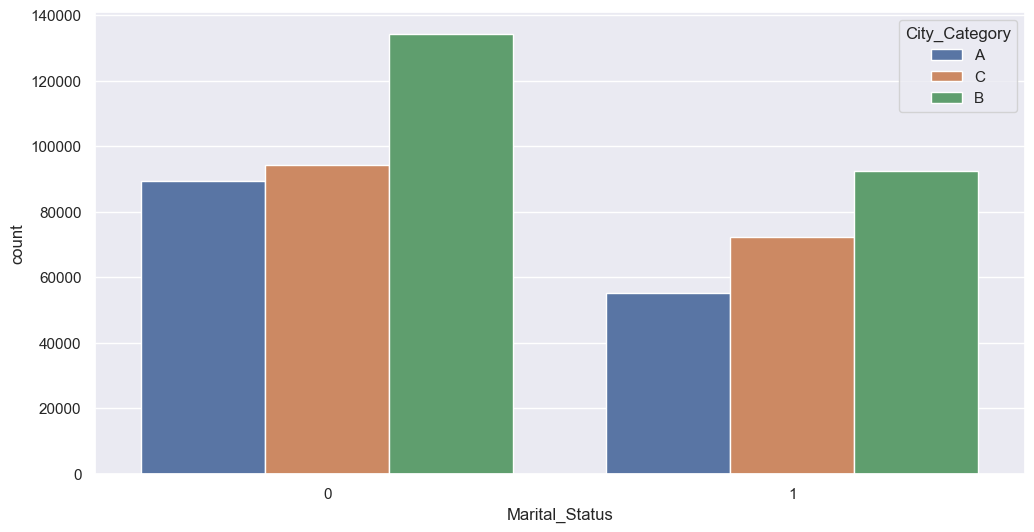

In [15]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

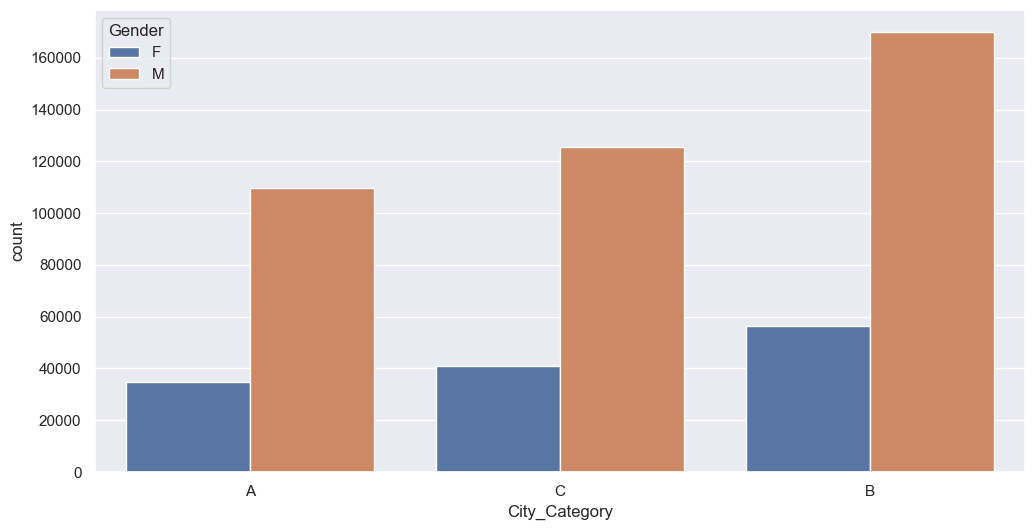

In [16]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\1007213296.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', title = 'Amount Spend by City_Category', autopct = '%.2f')


<Axes: title={'center': 'Amount Spend by City_Category'}, ylabel='Purchase'>

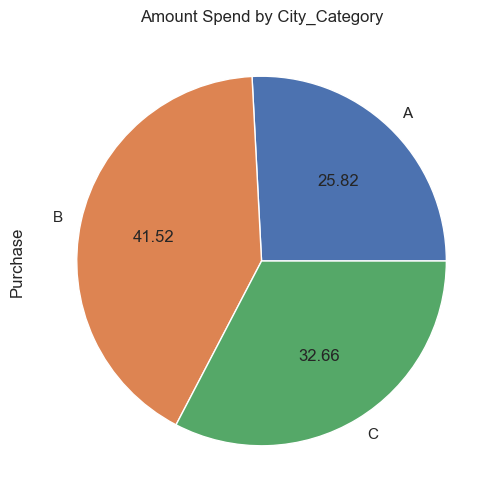

In [20]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', title = 'Amount Spend by City_Category', autopct = '%.2f')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\4055123350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', title = 'Amount Spend by City_Category', autopct = '%.2f')


<Axes: title={'center': 'Amount Spend by City_Category'}, ylabel='Purchase'>

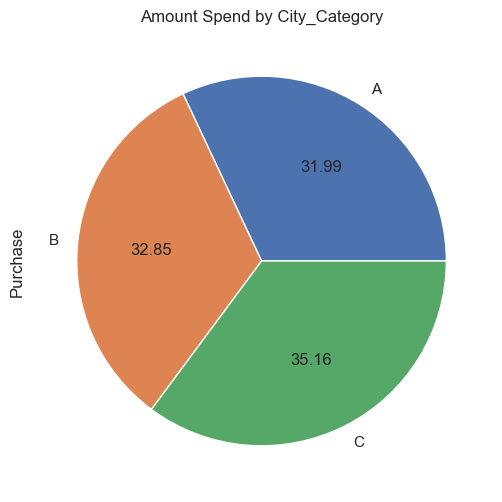

In [21]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', title = 'Amount Spend by City_Category', autopct = '%.2f')

### OCCUPATION AND PRODUCT ANALYSIS

In [22]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

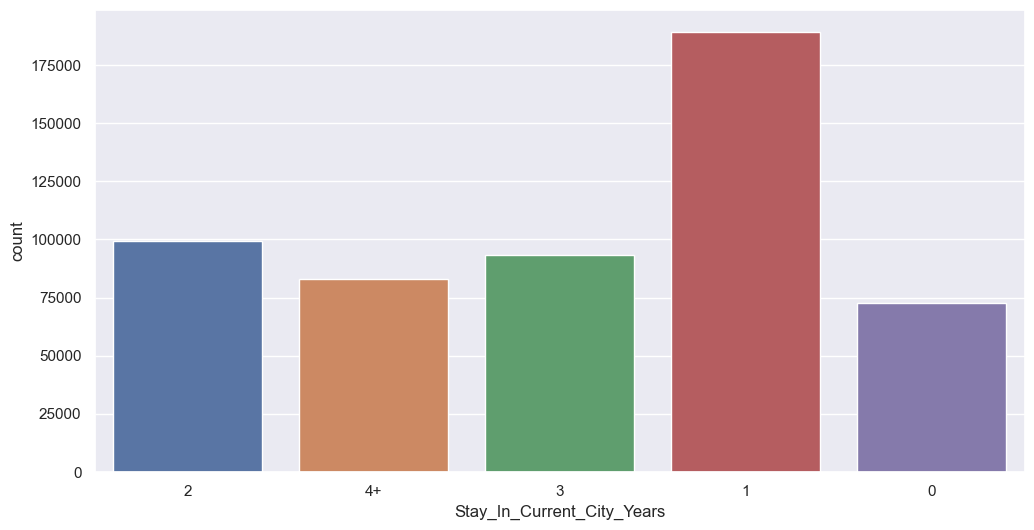

In [23]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: >

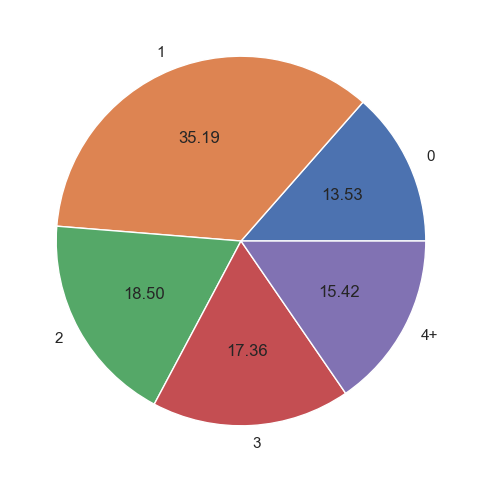

In [25]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = '%.2f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

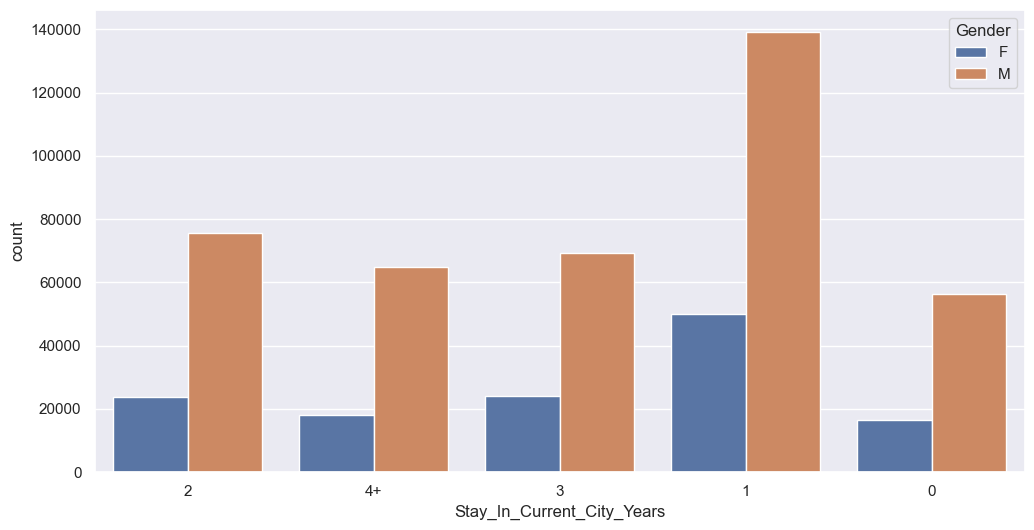

In [26]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

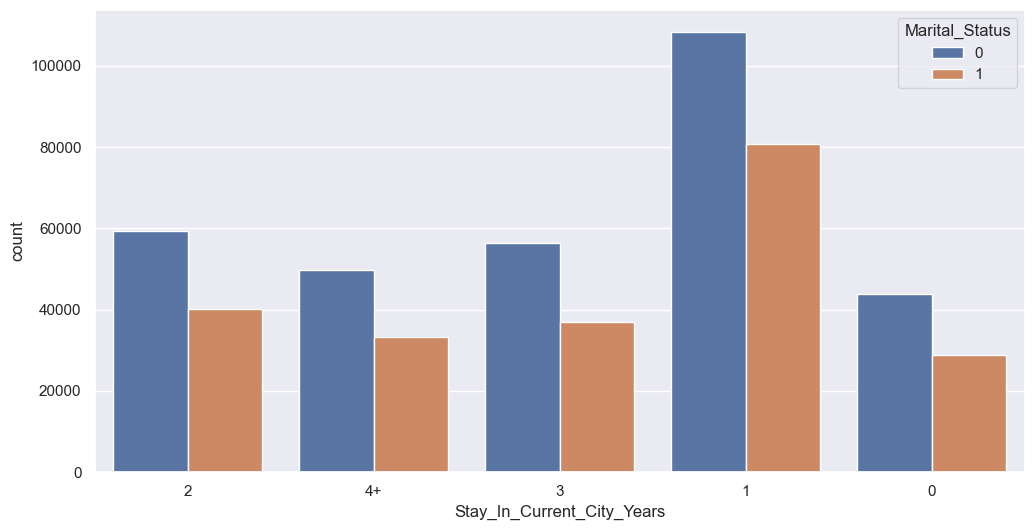

In [27]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

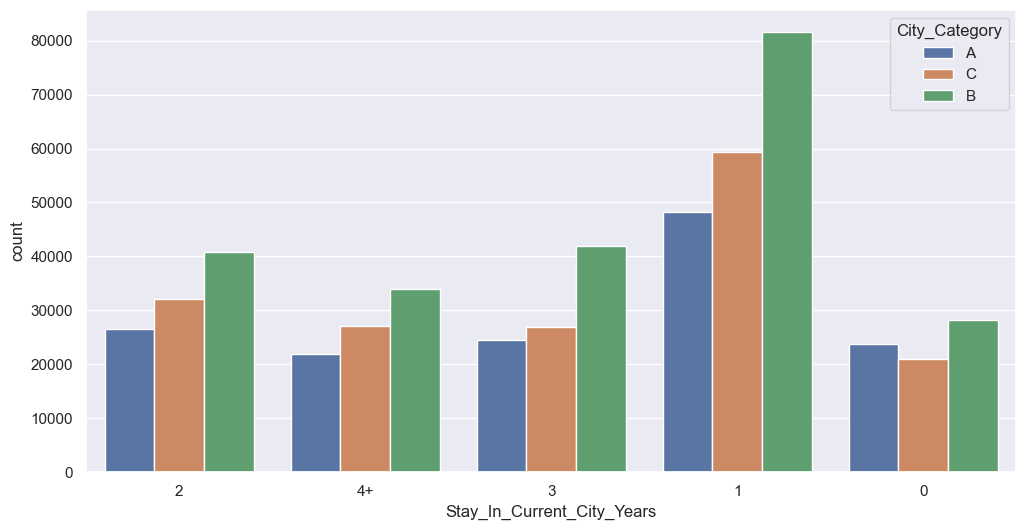

In [29]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

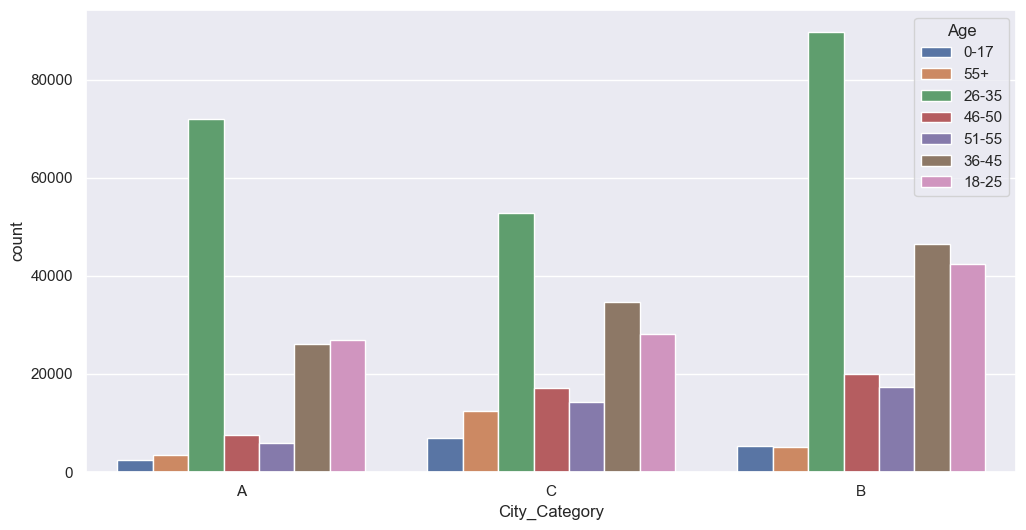

In [30]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\2549684239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

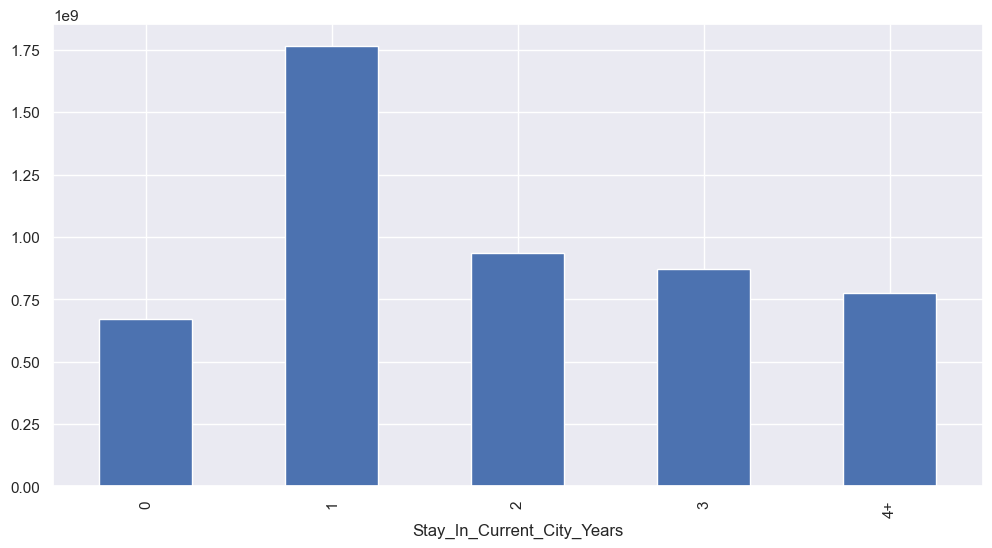

In [31]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\1632985777.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

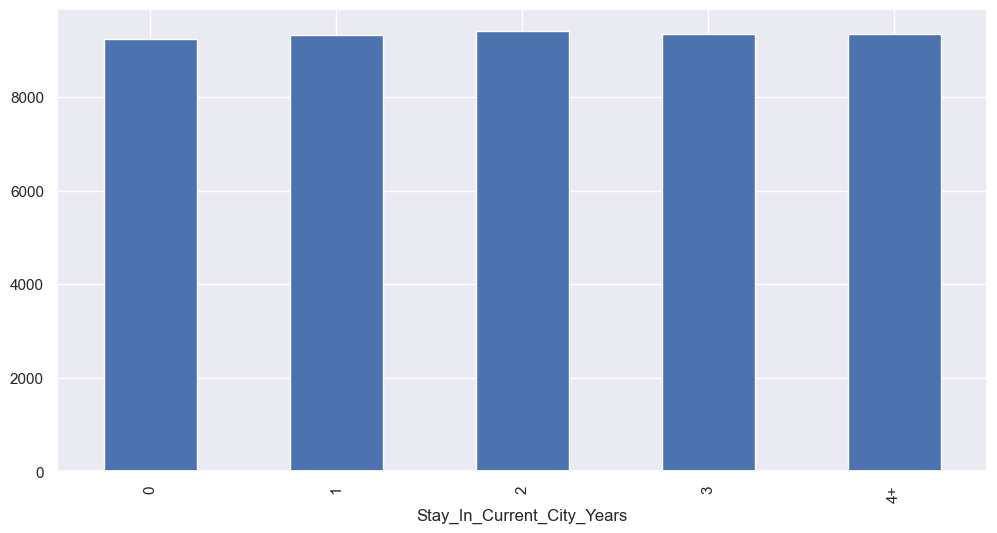

In [32]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

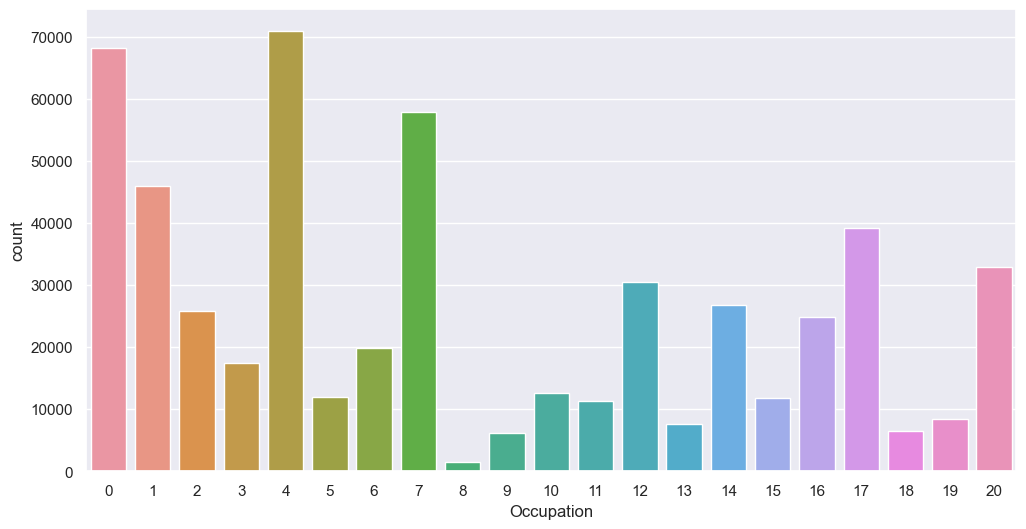

In [33]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

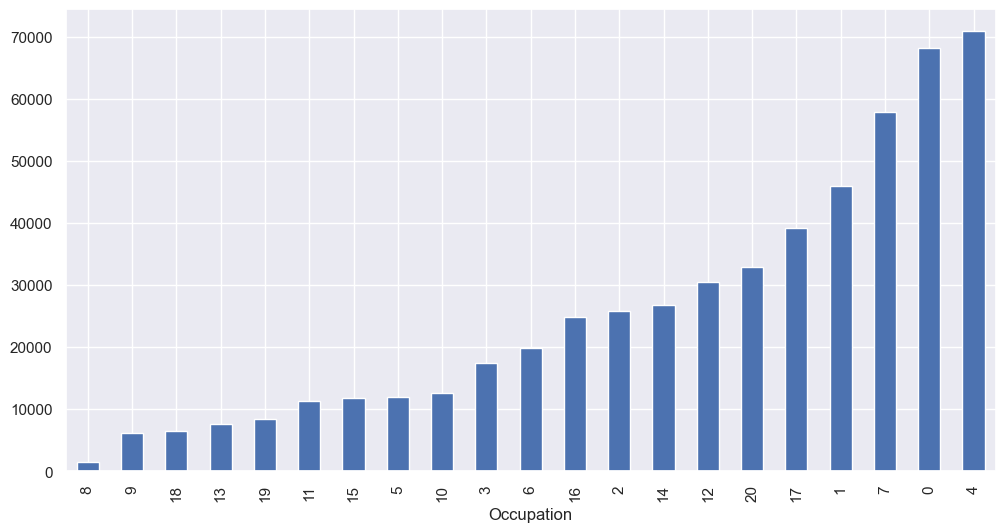

In [36]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\2195280667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Occupation'>

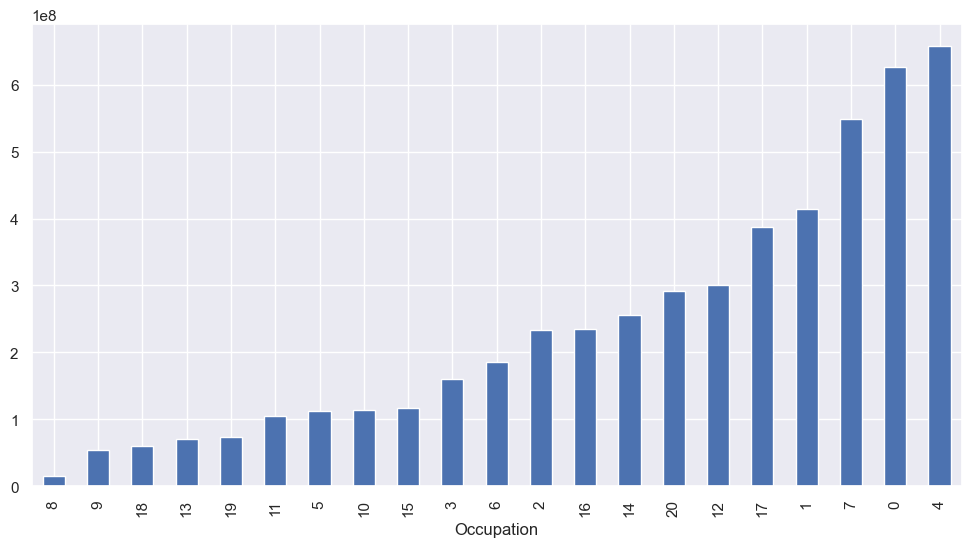

In [37]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\836120488.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Occupation'>

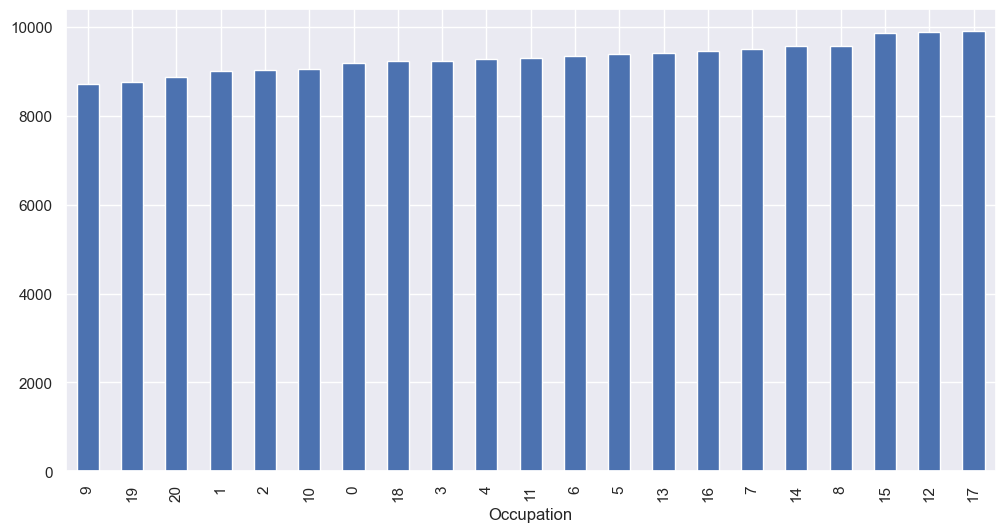

In [38]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

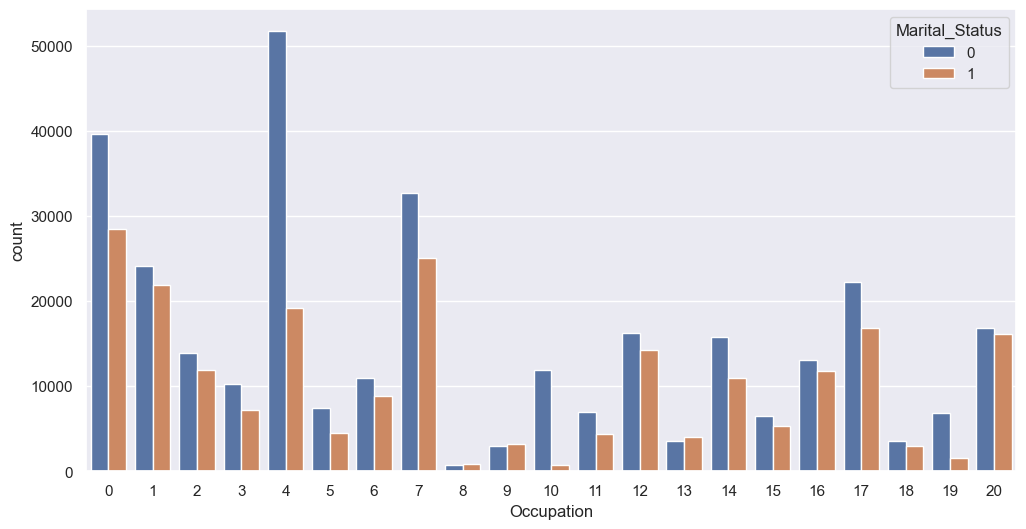

In [39]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

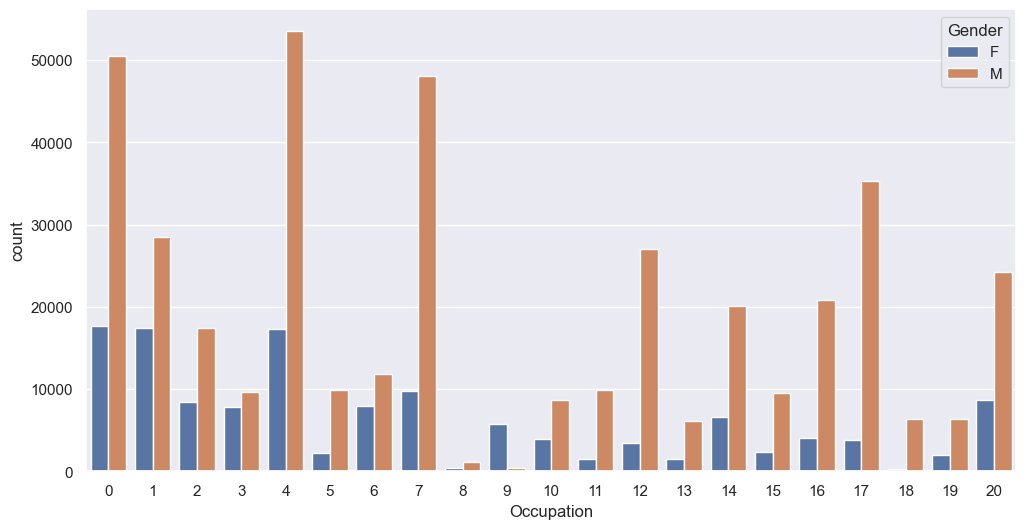

In [40]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

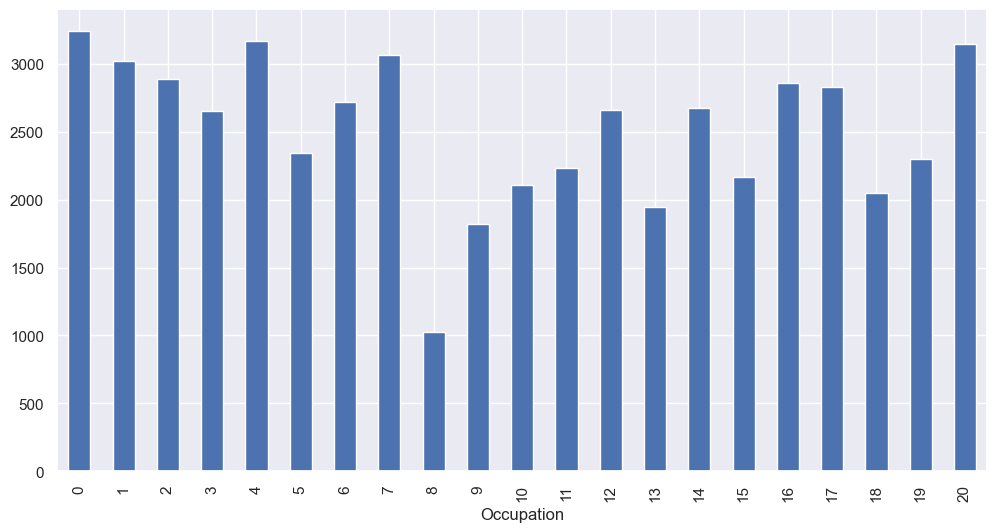

In [41]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

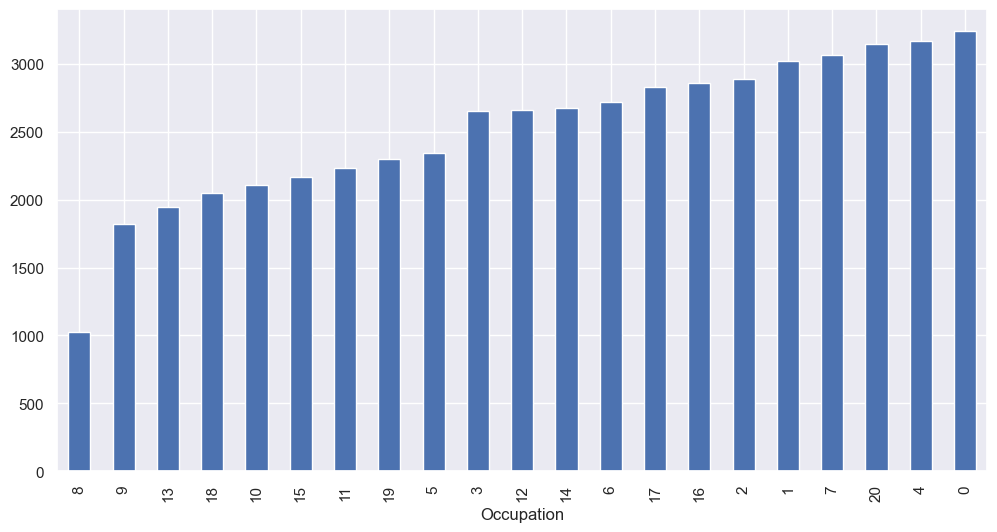

In [43]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

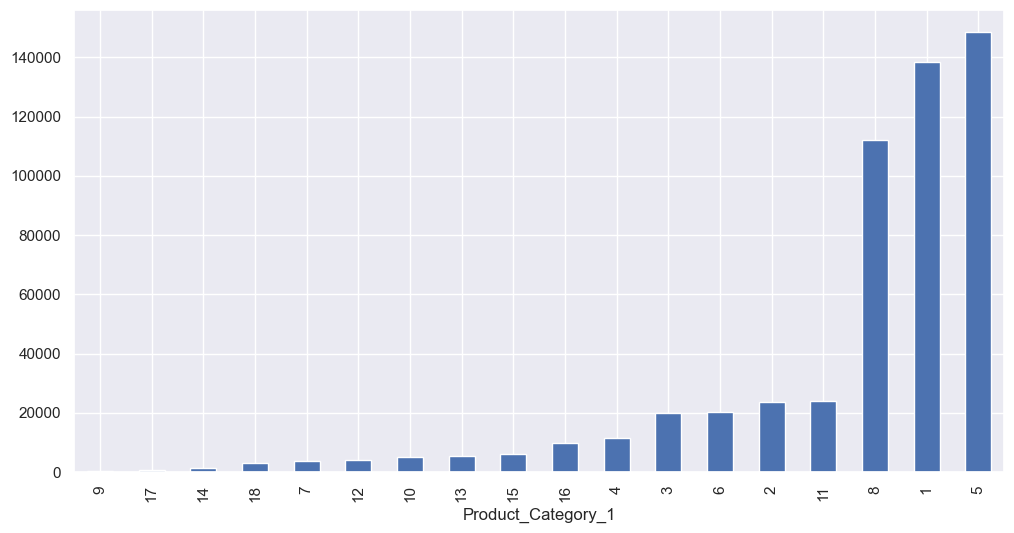

In [45]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\2703638129.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

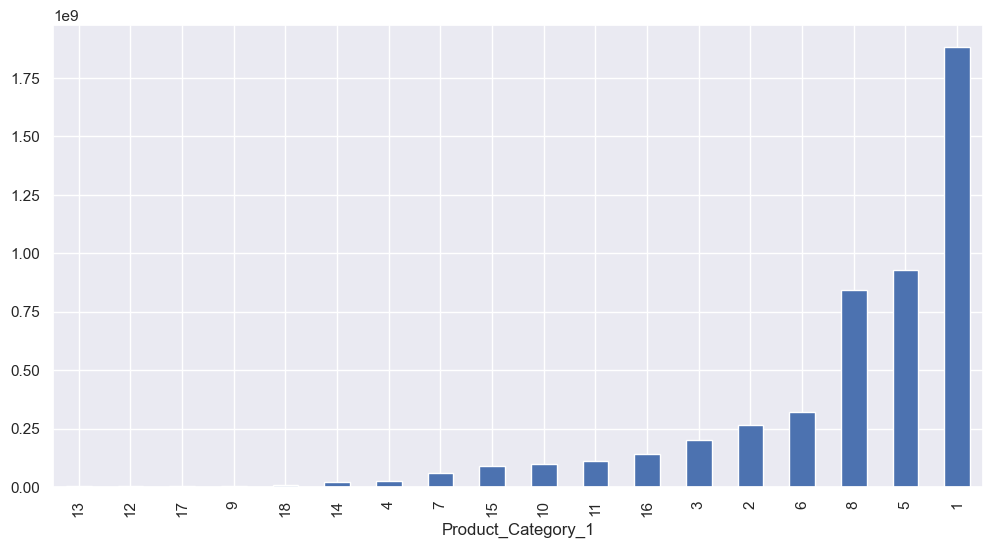

In [46]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\3011761601.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

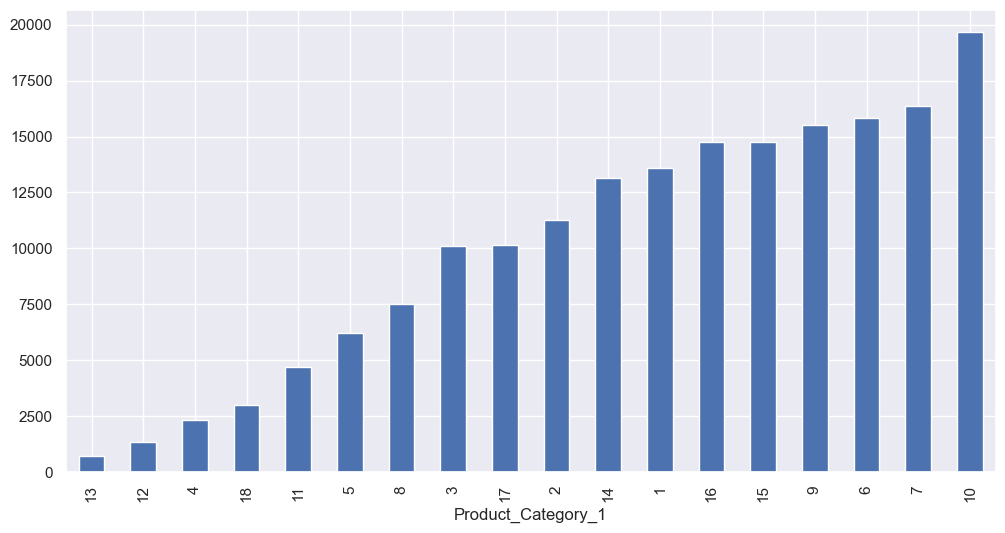

In [47]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\Priyanshu Jaiswal\AppData\Local\Temp\ipykernel_38372\1632911214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_ID'>

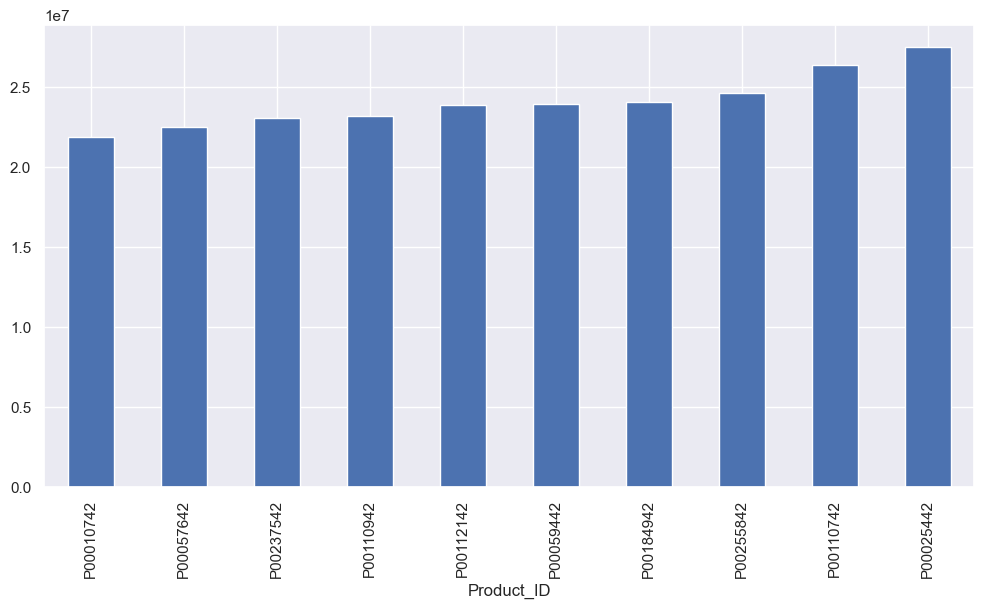

In [52]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

### COMBINING GENDER AND MARITAL STATUS

In [62]:
lst =[]
for i in range(len(df)):
    lst.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))
df['Marital_Gender'] = lst

In [63]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,M_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664,M_0
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196,M_0
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043,M_0
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172,M_0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


<Axes: xlabel='Marital_Gender', ylabel='count'>

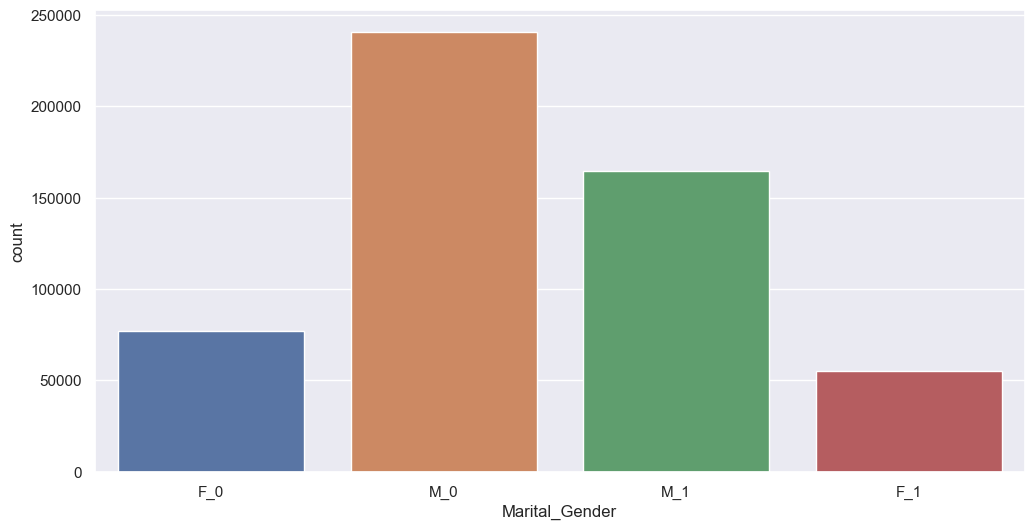

In [64]:
sns.countplot(x = df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

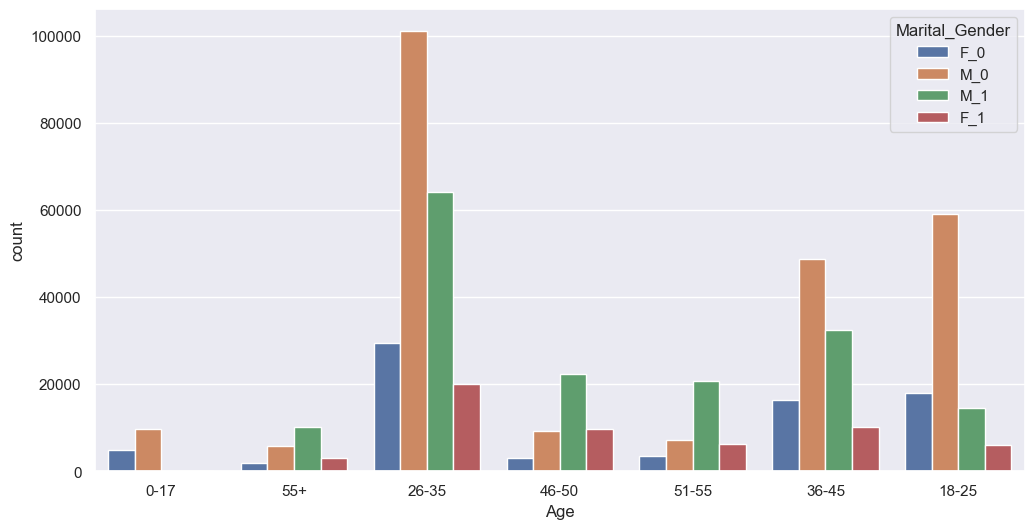

In [69]:
sns.countplot(x = 'Age', hue = 'Marital_Gender', data = df)

<Axes: xlabel='Age', ylabel='count'>

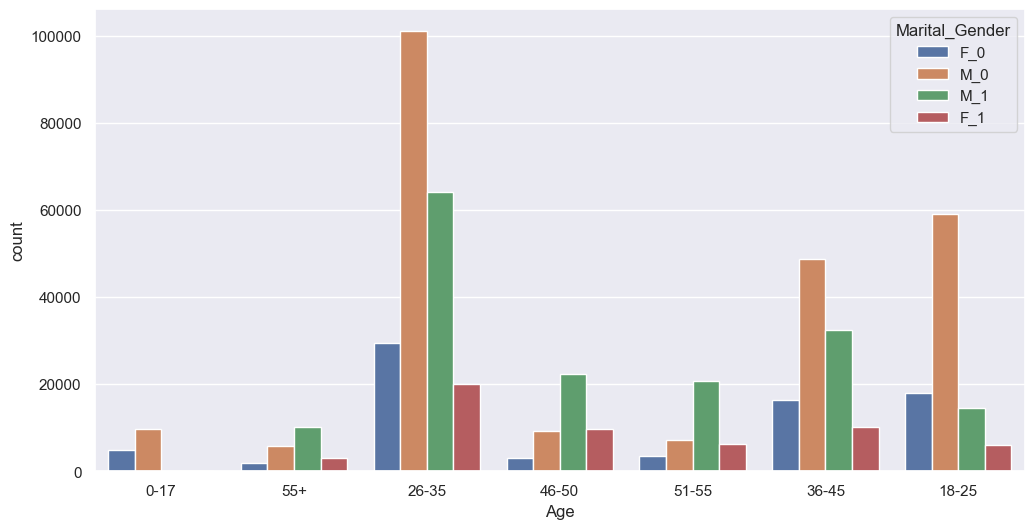

In [67]:
sns.countplot(x = df['Age'], hue = df['Marital_Gender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

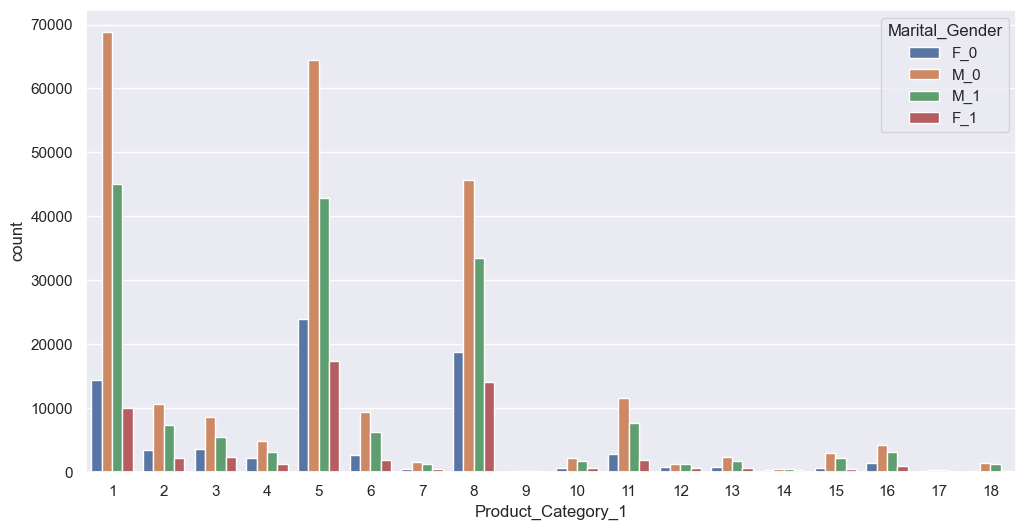

In [70]:
sns.countplot(x = df['Product_Category_1'], hue = df['Marital_Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

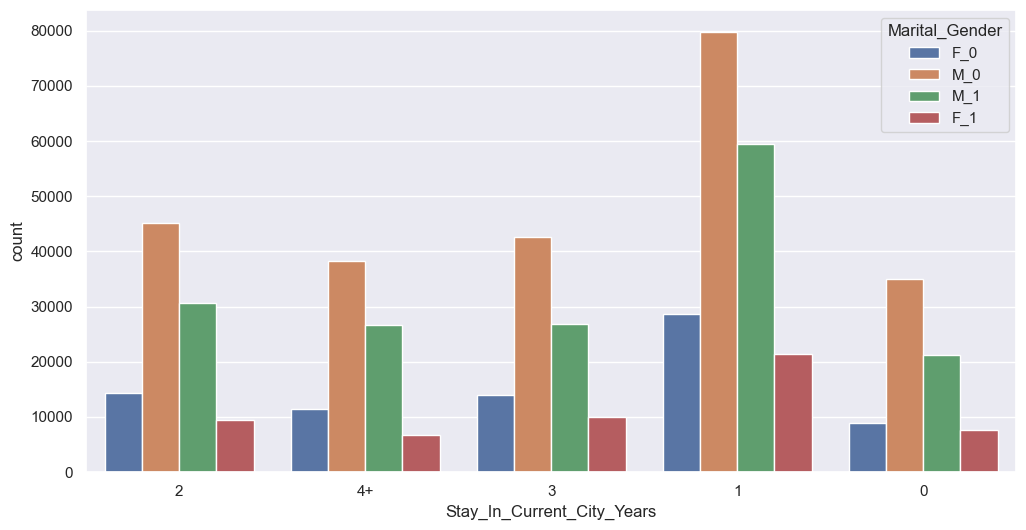

In [72]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Marital_Gender'])

<Axes: xlabel='City_Category', ylabel='count'>

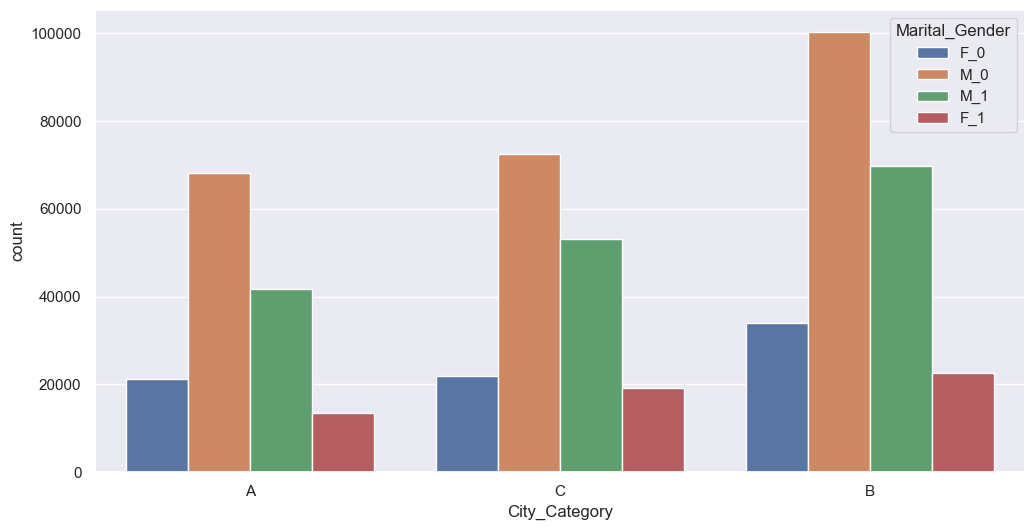

In [73]:
sns.countplot(x = df['City_Category'], hue = df['Marital_Gender'])